# Imported needed packages

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# read in the covid data and remove the following columns

>All-cause death count, 2018

>All-cause death count, 2017

>Log of average distance to SARS countries

# round all floats to three decimal places

In [2]:
#my_path = os.chdir('/Users/colinobrien/Desktop/Repo/DS_5100/ds5100_prog_for_ds_jv')
COVID_data = pd.read_excel('MortalityDataWHR2021C2.xlsx')
#print(COVID_data.columns)

cols_to_remove = ['Island','All-cause death count, 2018','All-cause death count, 2017','Log of average distance to SARS countries']
removed_cols = COVID_data[cols_to_remove]

COVID_data_cleaned = COVID_data.drop(cols_to_remove, axis=1)
pd.options.display.float_format = '{:.3f}'.format 
# COVID_data_cleaned 

# read in the 2020 and 2021 happiness data.
## rename the columns to include a '20_' or '21_' 
## rename country name and regional indicators (and drop regional indicators from one of them) to make merging easier later

In [3]:
happy20 = pd.read_csv('WHR2020.csv')

old_header = list(happy20.columns.values)
new_header = ['20_' + i for i in old_header]


happy20_cleaned1 = pd.read_csv('WHR2020.csv', names = new_header, header = None, skiprows=1)
happy20_cleaned1 = happy20_cleaned1.rename(columns = {'20_Country name':'Country name'})
happy20_cleaned = happy20_cleaned1.drop('20_Regional indicator', axis=1)

In [4]:
happy21 = pd.read_csv('world-happiness-report-2021.csv')

old_header2 = list(happy21.columns.values)
new_header2 = ['21_' + i for i in old_header2]


happy21_cleaned = pd.read_csv('world-happiness-report-2021.csv', names = new_header2, header = None,  skiprows=1)
happy21_cleaned = happy21_cleaned.rename(columns = {'21_Country name':'Country name', '21_Regional indicator':'Regional indicator'})

# merge happiness data on country name

## I merged with how='left' so that it dropped countries that were only taken for one of the two years

In [5]:
happy_21_and_20 = pd.merge(happy21_cleaned, happy20_cleaned , on="Country name", how='left')

# I created columns that take the difference between the numeric columns of 2020 and 2021

In [6]:
happy_covid_column_list = list(happy_21_and_20.columns)
cols_for_21 = [i for i in happy_covid_column_list if i.startswith('21_')]
cols_for_20 = [i for i in happy_covid_column_list if i.startswith('20_')]

for new_col in range(len(cols_for_21)):
    happy_21_and_20[cols_for_21[new_col][3:] + '_diff'] = happy_21_and_20[cols_for_21[new_col]] - happy_21_and_20[cols_for_20[new_col]]

#happy_21_and_20.columns

# merge all happiness (with the added difference columns) with the cleaned covid data

In [7]:
happy_and_COVID = pd.merge(happy_21_and_20, COVID_data_cleaned , on="Country name", how='left')
happy_and_COVID.to_csv("happy_and_COVID.csv", sep=",")
happy_and_COVID.head()

,Country name,Regional indicator,21_Ladder score,21_Standard error of ladder score,21_upperwhisker,21_lowerwhisker,21_Logged GDP per capita,21_Social support,21_Healthy life expectancy,21_Freedom to make life choices,...,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of exposure to COVID-19 infections in other countries as of March 31,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,10.125,42.800,2.225,0.000,1.000,0.550,25.900,53821.000,55663.000,31.510
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,22.409,42.300,3.953,0.000,1.000,0.572,27.800,53805.000,55477.000,25.534
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,88.334,43.100,5.584,0.000,0.000,0.660,30.100,67515.000,77087.000,116.680
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,8.498,37.300,1.649,0.000,1.000,0.325,24.100,2261.000,2321.000,21.445
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,67.260,43.200,5.574,0.000,0.000,0.522,27.000,151547.000,171175.000,114.468


# save the merged data into a csv

In [8]:
happy_and_COVID.to_csv("happy_and_COVID.csv", sep=",")
happy_and_COVID

,Country name,Regional indicator,21_Ladder score,21_Standard error of ladder score,21_upperwhisker,21_lowerwhisker,21_Logged GDP per capita,21_Social support,21_Healthy life expectancy,21_Freedom to make life choices,...,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of exposure to COVID-19 infections in other countries as of March 31,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,10.125,42.800,2.225,0.000,1.000,0.550,25.900,53821.000,55663.000,31.510
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,22.409,42.300,3.953,0.000,1.000,0.572,27.800,53805.000,55477.000,25.534
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,88.334,43.100,5.584,0.000,0.000,0.660,30.100,67515.000,77087.000,116.680
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,8.498,37.300,1.649,0.000,1.000,0.325,24.100,2261.000,2321.000,21.445
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,67.260,43.200,5.574,0.000,0.000,0.522,27.000,151547.000,171175.000,114.468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,2.381,24.000,0.586,0.000,0.000,0.279,54.180,NaN,NaN,NaN
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,1.786,25.800,0.628,0.000,0.000,0.435,53.330,NaN,NaN,NaN
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.710,20.300,0.801,0.000,0.000,0.906,43.710,NaN,NaN,NaN
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,2.442,19.600,0.645,0.000,0.000,0.287,40.363,NaN,NaN,NaN


## Exploring Data


Text(0, 0.5, 'deaths per 100 thousand')

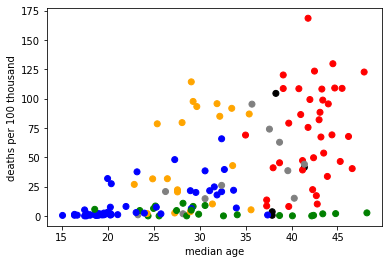

In [9]:
regions = set(happy_and_COVID['Regional indicator'])
colors = {'Western Europe':'red', 
          'Middle East and North Africa':'blue', 
          'Sub-Saharan Africa':'blue', 
          'North America and ANZ':'black', 
          'Southeast Asia':'green', 
          'East Asia':'green', 
          'South Asia':'green', 
          'Latin America and Caribbean':'orange', 
          'Central and Eastern Europe':'red',
          'Commonwealth of Independent States':'grey'}
x = happy_and_COVID['Median age']
y = happy_and_COVID['COVID-19 deaths per 100,000 population in 2020']
my_plot =plt.scatter(x,y, c=happy_and_COVID['Regional indicator'].map(colors))
plt.xlabel('median age')
plt.ylabel('deaths per 100 thousand')

Text(0, 0.5, 'deaths per 100 thousand')

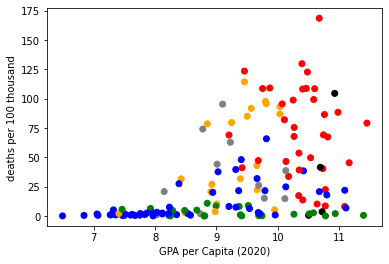

In [10]:
x2 = happy_and_COVID['20_Logged GDP per capita']
y2 = happy_and_COVID['COVID-19 deaths per 100,000 population in 2020']
my_plot = plt.scatter(x2,y2, c=happy_and_COVID['Regional indicator'].map(colors))
plt.xlabel('GPA per Capita (2020)')
plt.ylabel('deaths per 100 thousand')

Text(0, 0.5, 'deaths per 100 thousand')

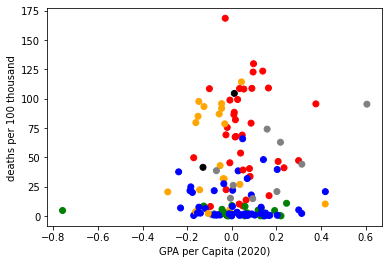

In [16]:
x3 = happy_and_COVID['Ladder score_diff']
y3 = happy_and_COVID['COVID-19 deaths per 100,000 population in 2020']
my_plot = plt.scatter(x3,y3, c=happy_and_COVID['Regional indicator'].map(colors))
plt.xlabel('GPA per Capita (2020)')
plt.ylabel('deaths per 100 thousand')

In [28]:
pd.pivot_table(happy_and_COVID, values = ['COVID-19 deaths per 100,000 population in 2020','20_Ladder score', '21_Ladder score'], columns=["Female head of government"], aggfunc = [np.mean, np.median])
#

mean        median      
Female head of government                       0.000  1.000  0.000 1.000
20_Ladder score                                 5.445  5.933  5.510 6.119
21_Ladder score                                 5.460  6.008  5.472 6.222
COVID-19 deaths per 100,000 population in 2020 35.174 20.685 16.473 8.283

In [30]:
happy_and_COVID.groupby('20_Ladder score').count()

,Country name,Regional indicator,21_Ladder score,21_Standard error of ladder score,21_upperwhisker,21_lowerwhisker,21_Logged GDP per capita,21_Social support,21_Healthy life expectancy,21_Freedom to make life choices,...,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of exposure to COVID-19 infections in other countries as of March 31,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
20_Ladder score,,,,,,,,,,,,,,,,,,,,,
2.567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3.299,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3.312,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3.476,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
3.479,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.488,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7.504,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7.560,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
pd.pivot_table(happy_and_COVID, values = ['COVID-19 deaths per 100,000 population in 2020','20_Ladder score', '21_Ladder score', 'Ladder score_diff'], 
               columns=["Regional indicator"], aggfunc = [np.median])


median  \
Regional indicator                             Central and Eastern Europe   
20_Ladder score                                                     6.011   
21_Ladder score                                                     6.078   
COVID-19 deaths per 100,000 population in 2020                     81.959   
Ladder score_diff                                                   0.068   

                                                                                   \
Regional indicator                             Commonwealth of Independent States   
20_Ladder score                                                             5.541   
21_Ladder score                                                             5.472   
COVID-19 deaths per 100,000 population in 2020                             26.048   
Ladder score_diff                                                           0.050   

                                                          \
Regional indicator                             East Asia   
20_Ladder score                                    5.691   
21_Ladder score                                    5.761   
COVID-19 deaths per 100,000 population in 2020     1.060   
Ladder score_diff                                  0.099   

                                                                            \
Regional indicator                             Latin America and Caribbean   
20_Ladder score                                                      6.056   
21_Ladder score                                                      5.992   
COVID-19 deaths per 100,000 population in 2020                      37.303   
Ladder score_diff                                                   -0.054   

                                                                             \
Regional indicator                             Middle East and North Africa   
20_Ladder score                                                       5.005   
21_Ladder score                                                       4.887   
COVID-19 deaths per 100,000 population in 2020                       21.510   
Ladder score_diff                                                     0.004   

                                                                      \
Regional indicator                             North America and ANZ   
20_Ladder score                                                7.227   
21_Ladder score                                                7.143   
COVID-19 deaths per 100,000 population in 2020                22.491   
Ladder score_diff                                             -0.031   

                                                                          \
Regional indicator                             South Asia Southeast Asia   
20_Ladder score                                     4.833          5.353   
21_Ladder score                                     4.934          5.384   
COVID-19 deaths per 100,000 population in 2020      5.628          0.496   
Ladder score_diff                                   0.000         -0.000   

                                                                   \
Regional indicator                             Sub-Saharan Africa   
20_Ladder score                                             4.565   
21_Ladder score                                             4.616   
COVID-19 deaths per 100,000 population in 2020              1.078   
Ladder score_diff                                           0.035   

                                                               
Regional indicator                             Western Europe  
20_Ladder score                                         7.094  
21_Ladder score                                         7.085  
COVID-19 deaths per 100,000 population in 2020         67.494  
Ladder score_diff                                       0.015

# I added colors to Ryans graphs (by region)

In [13]:
#list out all of the columns
list(happy_and_COVID.columns)

['Country name',
 'Regional indicator',
 '21_Ladder score',
 '21_Standard error of ladder score',
 '21_upperwhisker',
 '21_lowerwhisker',
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia',
 '21_Explained by: Log GDP per capita',
 '21_Explained by: Social support',
 '21_Explained by: Healthy life expectancy',
 '21_Explained by: Freedom to make life choices',
 '21_Explained by: Generosity',
 '21_Explained by: Perceptions of corruption',
 '21_Dystopia + residual',
 '20_Ladder score',
 '20_Standard error of ladder score',
 '20_upperwhisker',
 '20_lowerwhisker',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Expl

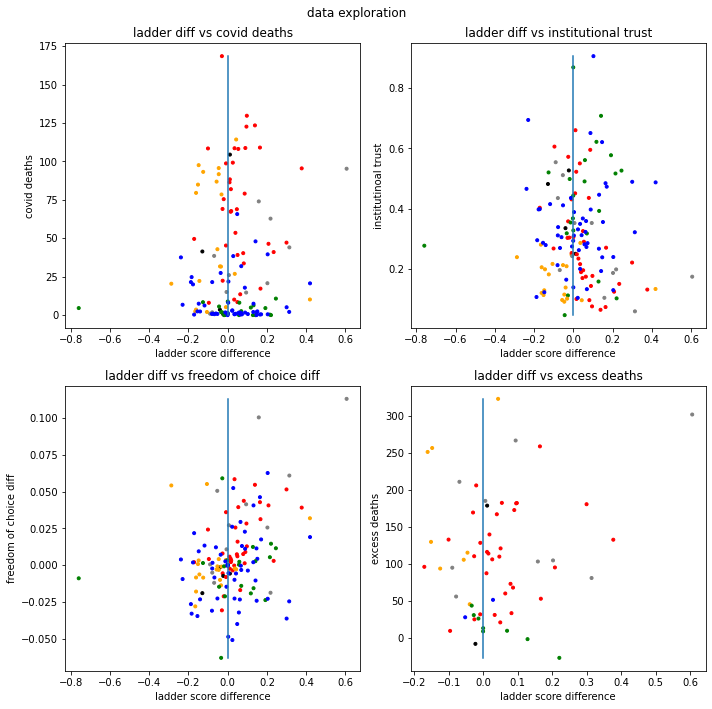

In [14]:
#Here I plot four graphs. I compare the difference in ladder score from 2021 to 2020 to the four listed variables below

ladder_21 = happy_and_COVID['21_Ladder score']
ladder_20 = happy_and_COVID['20_Ladder score']
ladder_diff = happy_and_COVID['Ladder score_diff']
x = happy_and_COVID['Index of institutional trust']
y = happy_and_COVID['COVID-19 deaths per 100,000 population in 2020']
z = happy_and_COVID['Freedom to make life choices_diff']
a = happy_and_COVID['Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average'] 
col = colors


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
#plt.figsize(30)
fig.suptitle('data exploration')


ax1.scatter(ladder_diff, y, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax1.plot((0,0), (min(y),max(y)))
ax1.set_title('ladder diff vs covid deaths')
ax1.set_xlabel('ladder score difference')
ax1.set_ylabel('covid deaths')


ax2.scatter(ladder_diff, x, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax2.plot((0,0), (min(x),max(x)))
ax2.set_title('ladder diff vs institutional trust')
ax2.set_xlabel('ladder score difference')
ax2.set_ylabel('institutinoal trust')


ax3.scatter(ladder_diff, z, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax3.plot((0,0), (min(z),max(z)))
ax3.set_title('ladder diff vs freedom of choice diff')
ax3.set_xlabel('ladder score difference')
ax3.set_ylabel('freedom of choice diff')


ax4.scatter(ladder_diff, a, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax4.plot((0,0), (min(a),max(a)))
ax4.set_title('ladder diff vs excess deaths')
ax4.set_xlabel('ladder score difference')
ax4.set_ylabel('excess deaths')


fig.tight_layout()


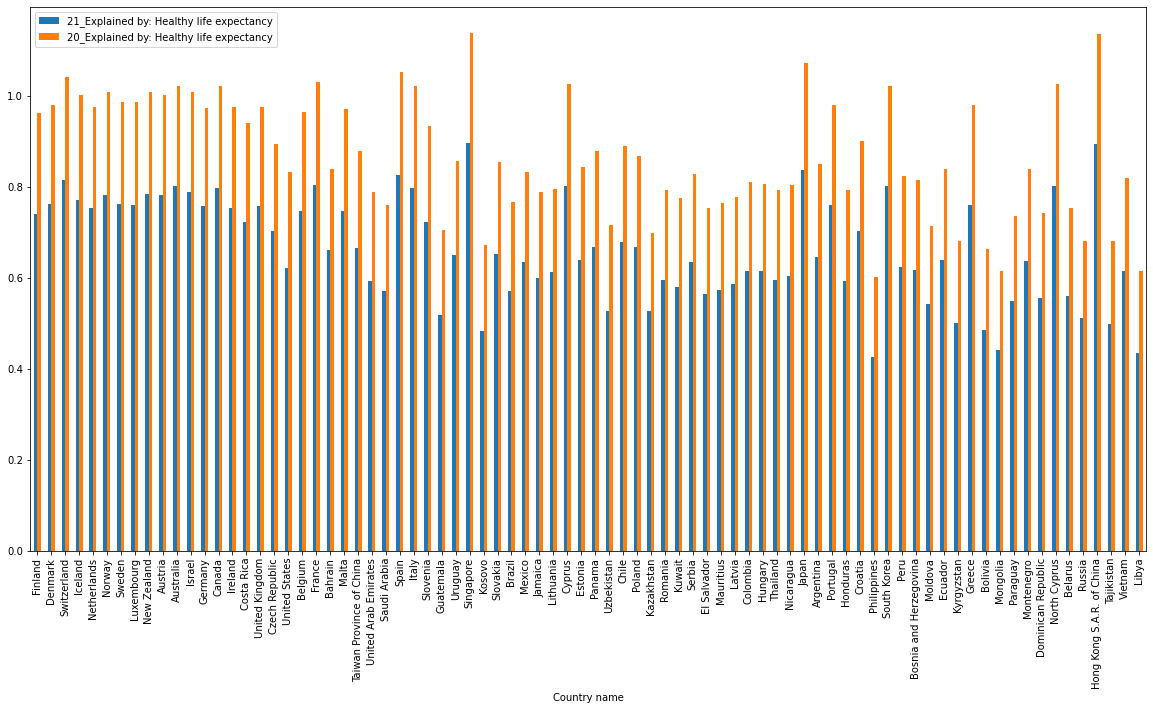

In [15]:
life_expect = happy_and_COVID[['Country name','21_Explained by: Healthy life expectancy', '20_Explained by: Healthy life expectancy']]
life_expect = life_expect[0:80]
ax1 = life_expect.plot.bar(x = "Country name", figsize = (20,10))

<AxesSubplot:ylabel='Frequency'>

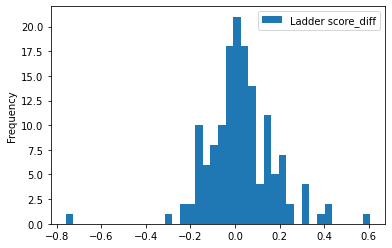

In [26]:
ladder_chage = happy_and_COVID[['Ladder score_diff']]
ladder_chage
ladder_chage.plot.hist(bins=40)



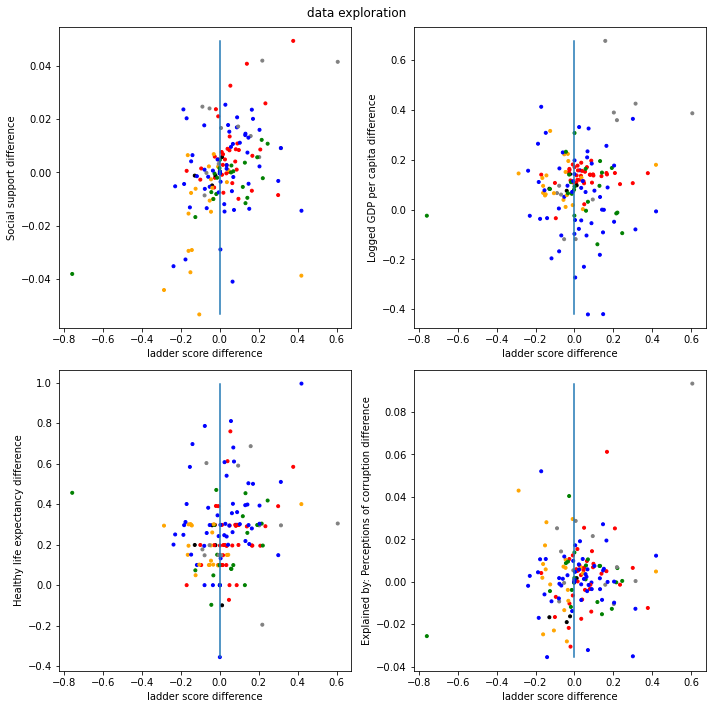

In [43]:
#Here I plot four graphs. I compare the difference in ladder score from 2021 to 2020 to the four listed variables below

ladder_21 = happy_and_COVID['21_Ladder score']
ladder_20 = happy_and_COVID['20_Ladder score']
ladder_diff = happy_and_COVID['Ladder score_diff']
x = happy_and_COVID['Logged GDP per capita_diff']
y = happy_and_COVID['Social support_diff']
z = happy_and_COVID['Healthy life expectancy_diff']
a = happy_and_COVID['Explained by: Perceptions of corruption_diff'] 
col = colors


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
#plt.figsize(30)
fig.suptitle('data exploration')


ax1.scatter(ladder_diff, y, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax1.plot((0,0), (min(y),max(y)))
# ax1.set_title('ladder diff vs covid deaths')
ax1.set_xlabel('ladder score difference')
ax1.set_ylabel('Social support difference')


ax2.scatter(ladder_diff, x, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax2.plot((0,0), (min(x),max(x)))
# ax2.set_title('ladder diff vs institutional trust')
ax2.set_xlabel('ladder score difference')
ax2.set_ylabel('Logged GDP per capita difference')


ax3.scatter(ladder_diff, z, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax3.plot((0,0), (min(z),max(z)))
# ax3.set_title('ladder diff vs freedom of choice diff')
ax3.set_xlabel('ladder score difference')
ax3.set_ylabel('Healthy life expectancy difference')


ax4.scatter(ladder_diff, a, c=happy_and_COVID['Regional indicator'].map(colors), marker='.')
ax4.plot((0,0), (min(a),max(a)))
# ax4.set_title('ladder diff vs excess deaths')
ax4.set_xlabel('ladder score difference')
ax4.set_ylabel('Explained by: Perceptions of corruption difference')


fig.tight_layout()
